# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

In [18]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [19]:
fraud.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [8]:
fraud['repeat_retailer'].unique()

array([1., 0.])

In [9]:
fraud['used_chip'].unique()

array([1., 0.])

In [10]:
fraud['used_pin_number'].unique()

array([0., 1.])

In [11]:
fraud['online_order'].unique()

array([0., 1.])

In [12]:
fraud['fraud'].unique()

array([0., 1.])

In [20]:
#casting 0,1 columns to Boolean
fraud['repeat_retailer'] = fraud['repeat_retailer'].astype(bool)
fraud['used_chip'] = fraud['used_chip'].astype(bool)
fraud['used_pin_number'] = fraud['used_pin_number'].astype(bool)
fraud['online_order'] = fraud['online_order'].astype(bool)
fraud['fraud'] = fraud['fraud'].astype(bool)

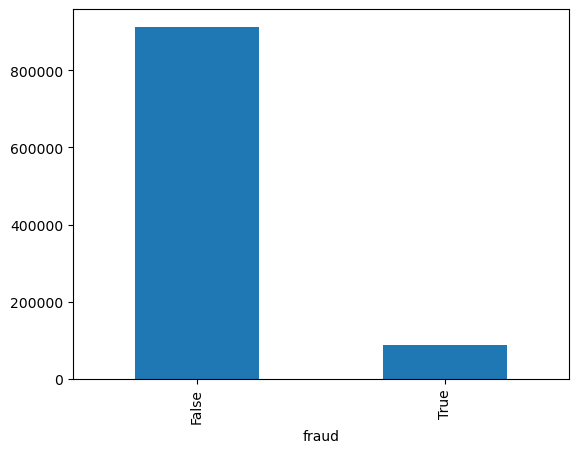

In [15]:
#displaying distribution of target variable
#very unbalanced
fraud_dist = fraud["fraud"].value_counts()
fraud_dist.plot(kind="bar")
plt.show()

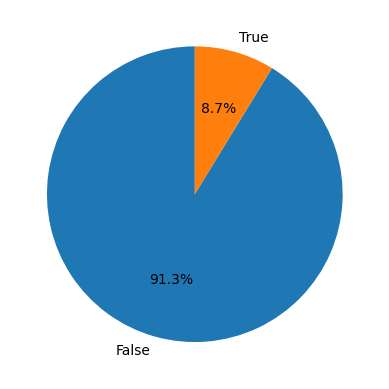

In [16]:
fraud_dist = fraud["fraud"].value_counts()
fraud_dist.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.ylabel("")  # Optional: removes the default y-axis label for a cleaner look
plt.show()

In [17]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [21]:
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,True,True,False,False,False
1,10.829943,0.175592,1.294219,True,False,False,False,False
2,5.091079,0.805153,0.427715,True,False,False,True,False
3,2.247564,5.600044,0.362663,True,True,False,True,False
4,44.190936,0.566486,2.222767,True,True,False,True,False


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler and apply it only on the numerical columns
scaler = StandardScaler()
numerical_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model.score(X_test, y_test)

0.95858

In [27]:
pred = model.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98    182557
        True       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000



In [ ]:
#Recall is 0.60, the model misses 40% of actual fraud cases => area for improvement
#F1-score for the True class is 0.72, lower than the False class (0.98). Model is less effective in detecting fraud cases than non-fraud cases.

In [29]:
#4. Running OVERSAMPLE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X2 = fraud.drop(columns=['fraud'])
Y2 = fraud['fraud']

# Split into train and test sets
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)
X2_train_resampled, Y2_train_resampled = ros.fit_resample(X2_train, Y2_train)

# Check the distribution after resampling
print("Class distribution after oversampling:")
print(Y2_train_resampled.value_counts())

# Train Logistic Regression model on resampled data
model = LogisticRegression()
model.fit(X2_train_resampled, Y2_train_resampled)

# Make predictions on the test set
Y2_pred = model.predict(X2_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(Y2_test, Y2_pred))


Class distribution after oversampling:
fraud
False    730040
True     730040
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.93      0.96    182557
        True       0.57      0.95      0.71     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



c:\Users\benoi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#improvement of recall for true class now capturing 95% of fraud cases

In [30]:
#5 Running UNDERSAMPLE
from imblearn.under_sampling import RandomUnderSampler

X3 = fraud.drop(columns=['fraud'])
Y3 = fraud['fraud']

# Split into train and test sets
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X3_train_resampled, Y3_train_resampled = rus.fit_resample(X3_train, Y3_train)

# Check the distribution after undersampling
print("Class distribution after undersampling:")
print(Y3_train_resampled.value_counts())

# Train Logistic Regression model on resampled data
model = LogisticRegression()
model.fit(X3_train_resampled, Y3_train_resampled)

# Make predictions on the test set
Y3_pred = model.predict(X3_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(Y3_test, Y3_pred))

Class distribution after undersampling:
fraud
False    69960
True     69960
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.93      0.96    182557
        True       0.57      0.95      0.71     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



c:\Users\benoi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#similar results with undersample than oversample

In [31]:
#6. Running SMOTE
from imblearn.over_sampling import SMOTE

# Define features and target
X4 = fraud.drop(columns=['fraud'])
Y4 = fraud['fraud']

# Split into train and test sets
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)
X4_train_resampled, Y4_train_resampled = smote.fit_resample(X4_train, Y4_train)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:")
print(Y4_train_resampled.value_counts())

# Train Logistic Regression model on SMOTE-resampled data
model = LogisticRegression()
model.fit(X4_train_resampled, Y4_train_resampled)

# Make predictions on the test set
Y4_pred = model.predict(X4_test)

# Evaluate model performance
print("Classification Report:")
print(classification_report(Y4_test, Y4_pred))

Class distribution after SMOTE:
fraud
False    730040
True     730040
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.93      0.96    182557
        True       0.57      0.95      0.71     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



c:\Users\benoi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 